In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import metrics 
from pandas import DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
"""Задание 
Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию"""

In [2]:
# Загружаем набор данных c Ирисами:
iris = datasets.load_iris()

In [48]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
print(iris.DESCR) # смотрим, что есть в файле

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
# Смотрим на названия переменных
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
#Для удобства делаем из них iris = datasets.load_iris() DataFrame:
df_iris =  DataFrame(iris.data)
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Смотрим на данные, выводим 10 первых строк: 
print (iris.data[:10])
# Смотрим на целевую переменную:
print (iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']


In [76]:
df_iris = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
df_iris.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
df_iris['target'] = iris.target
# добавляем столбец  variety - как class из Attribute Information:: 
df_iris['variety'] = df_iris.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,variety
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


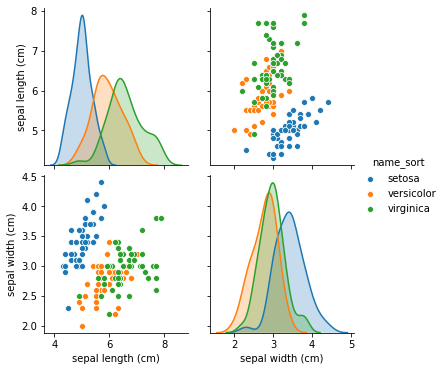

In [29]:
#Строим зависимостями между признаками, цвет точек распределения как сорт Ирисов
import seaborn as sns
sns.pairplot(df_iris[['sepal length (cm)','sepal width (cm)','name_sort']], hue = 'name_sort')

In [23]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [24]:
# разделяем выборку на тренировочную и тестовую, где 25% данных оставим на тест и 75% на обучение
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [26]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [30]:
lda = LinearDiscriminantAnalysis()

In [31]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1])

In [33]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [34]:
result

,0,1
0,2,2
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,1,1
9,1,1


In [35]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, lda.predict(X_test))

0.9736842105263158

In [37]:
# коэффициенты дискриминатных линий
lda.coef_
#на сколько этот коэффициент вносит больший вклад в возможность отделить точку от  других точек
#получилась одна дискриминантная линия и 4 признака в данных

array([[  6.36318878,  12.54934548, -16.69255333, -20.95790859],
       [ -1.87369731,  -4.23715922,   4.6316896 ,   3.12866162],
       [ -4.37134696,  -8.09344452,  11.74347258,  17.36005626]])

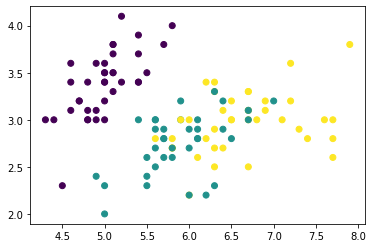

In [38]:
# визуализируем дискриминантную линию только по 2 признакам, т.к двухмерное представление 
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()


In [39]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

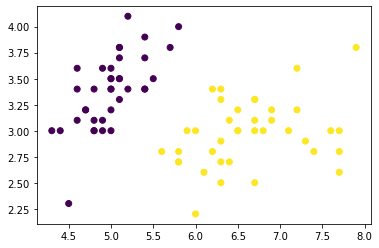

In [40]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()
# разделим их на две группы на 0 ина 2
# разделение двух групп друг от дуга и влияние на них признаков, обращаем внимание как они разделены: 
# видим, что признак y есть в обоих группах, а вот после определенного х начинается другой признак
# т.к наши данные линейно разделимые

In [41]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [42]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.9972973 , 3.38918919],
       [6.63421053, 2.97368421]])

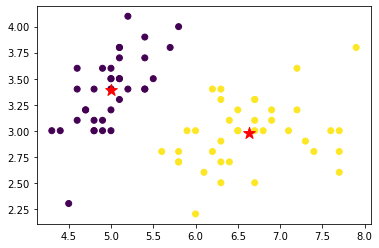

In [43]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
#найдем коэфициенты
#второй признак важнее первого для кластеризации
# также можно определить по наклону прямой

In [53]:
# второй признак в 9 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[ 9.38787001, -9.57533796]])

In [54]:
# определяем какая будет точность
accuracy_score(sy_test, lda_small.predict(small_test))

0.96

In [ ]:
#МЕТОД K-средних
#Подбераем оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
#Он разбивает множество элементов векторного пространства на заранее известное число кластеров k.
#Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера.
#Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, 
#полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, 
#какой из новых центров оказался ближе по выбранной метрике. 
#Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

In [66]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [67]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [68]:
X

array([[  2.92715511,   0.65529568],
       [  3.1067055 ,  -3.38977838],
       [  0.15037711,  -9.35064431],
       [  1.48074177,  -0.27175983],
       [ -1.16980006,  -0.03187885],
       [  5.55894728, -14.08358694],
       [  3.37234453,  -2.75733366],
       [  6.1243141 ,  -3.58585564],
       [ -0.41784634,   2.45168804],
       [  2.38899029,   3.26647361],
       [  3.44497549,   2.24902813],
       [  3.90703838,   1.21354977],
       [  5.20495737, -10.47577298],
       [  1.65670373, -10.01330949],
       [ 10.1102121 ,   1.92325593],
       [  1.46021072,  -0.98630999],
       [  4.63798853,   1.52851828],
       [  3.76164234,  -9.18519164],
       [ -3.52807816,   4.78845795],
       [  2.96664988,  -3.46480513],
       [  1.41392487,  -0.33290231],
       [  5.11592289,  -3.99887344],
       [  5.76257168,  -8.94192508],
       [  2.2166883 ,   4.00584615],
       [  1.74496514,  -4.70171997],
       [  8.1157953 ,   3.46369708],
       [  1.15181039,  -5.95330426],
 

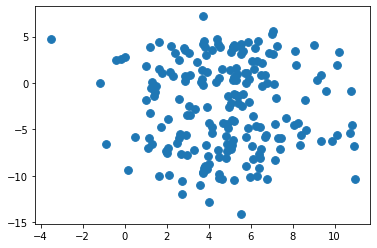

In [70]:
plt.scatter(X[:, 0], X[:, 1], cmap='summer', s=60)

In [71]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [72]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

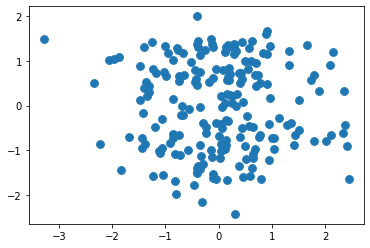

In [73]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='summer', s=60)

In [74]:
from sklearn.cluster import KMeans

In [75]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

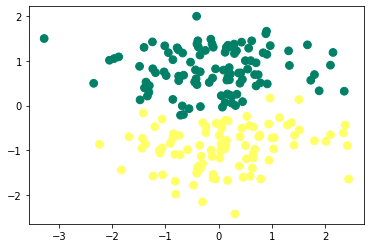

In [77]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='summer', c=clusters, s=60)

In [78]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

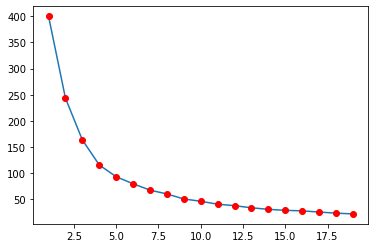

In [79]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [80]:
# ИЕРАРХИЧЕСКАЯ КЛАССТЕРИЗАЦИЯ
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

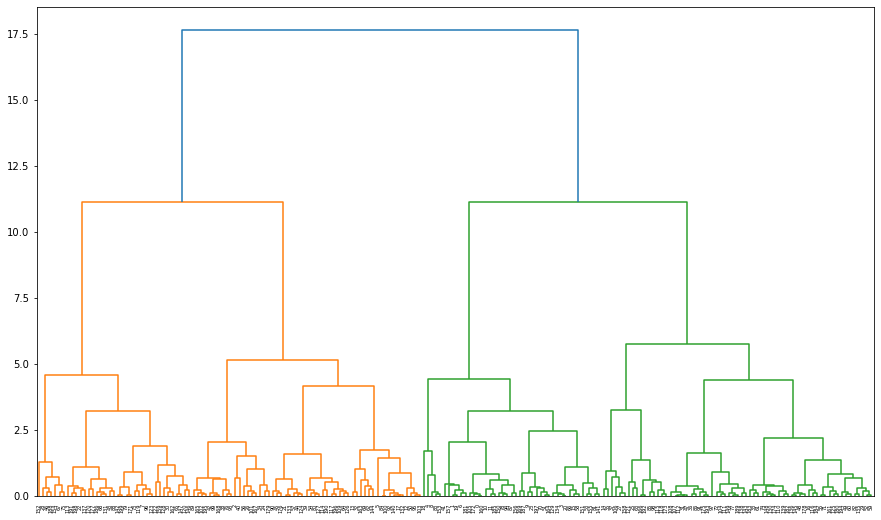

In [82]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(15, 9))
dn = hierarchy.dendrogram(Z)

In [83]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [84]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

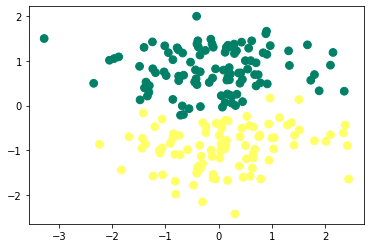

In [85]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='summer', c=clusters, s=60)

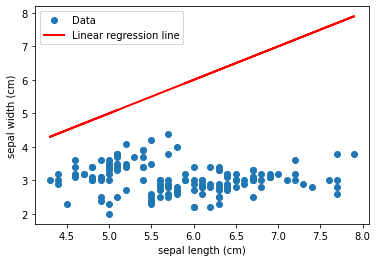

In [92]:
plt.plot(df_iris[['sepal length (cm)']], df_iris[['sepal width (cm)']],'o', label='Data')
plt.plot(df_iris[['sepal length (cm)']], df_iris[['sepal length (cm)']], 'r', linewidth=2, label='Linear regression line')
plt.ylabel('sepal width (cm)')
plt.xlabel('sepal length (cm)')
plt.legend()
plt.show()

In [94]:
df_iris[['sepal length (cm)','sepal width (cm)']].corr() #нахождение попарной корреляции всех столбцов

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000
